# Car Price Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

As we want to predict the price of the car we want to build a regression model

In [2]:
df=pd.read_csv('car_price_data.csv',index_col=0)

In [3]:
df.head()

,Brand,Model,Manufacture Year,variant,Fuel,Driven Kilometers,Transmission type,Location,Price,Number of owners
0,Renault,KWID,2016,1.0 RXT Optional AT 2016-2019,Petrol,"26,769 kms",automatic,Bhopal,"3,42,000",-
1,Renault,KWID,2019,1.0 RXT Optional AT 2016-2019,Petrol,"13,342 kms",automatic,Mumbai,"4,48,000",-
2,Hyundai,EON,2013,Magna Plus,Petrol,"33,824 kms",manual,Mumbai,"2,66,000",-
3,Maruti,Alto,2016,CNG LXI,CNG,"18,679 kms",manual,Mumbai,"3,46,500",-
4,Hyundai,Verna,2018,VTVT 1.6 SX,Petrol,"4,694 kms",manual,Mumbai,"9,54,000",-


In [4]:
df.shape

(5109, 10)

In [5]:
df.dtypes

Brand                object
Model                object
Manufacture Year      int64
variant              object
Fuel                 object
Driven Kilometers    object
Transmission type    object
Location             object
Price                object
Number of owners     object
dtype: object

In [6]:
df.isnull().sum()

Brand                0
Model                0
Manufacture Year     0
variant              0
Fuel                 0
Driven Kilometers    0
Transmission type    1
Location             0
Price                0
Number of owners     0
dtype: int64

In [7]:
df.describe()

,Manufacture Year
count,5109.000000
mean,2014.593267
std,3.335895
min,1989.000000
25%,2012.000000
50%,2015.000000
75%,2017.000000
max,2021.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5108
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              5109 non-null   object
 1   Model              5109 non-null   object
 2   Manufacture Year   5109 non-null   int64 
 3   variant            5109 non-null   object
 4   Fuel               5109 non-null   object
 5   Driven Kilometers  5109 non-null   object
 6   Transmission type  5108 non-null   object
 7   Location           5109 non-null   object
 8   Price              5109 non-null   object
 9   Number of owners   5109 non-null   object
dtypes: int64(1), object(9)
memory usage: 439.1+ KB


In [9]:
df.nunique()

Brand                  33
Model                 201
Manufacture Year       24
variant              1385
Fuel                    5
Driven Kilometers    2609
Transmission type       2
Location              123
Price                1356
Number of owners        9
dtype: int64

# EDA

In [10]:
df.isnull().sum()

Brand                0
Model                0
Manufacture Year     0
variant              0
Fuel                 0
Driven Kilometers    0
Transmission type    1
Location             0
Price                0
Number of owners     0
dtype: int64

In [11]:
#dropping na values
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

Brand                0
Model                0
Manufacture Year     0
variant              0
Fuel                 0
Driven Kilometers    0
Transmission type    0
Location             0
Price                0
Number of owners     0
dtype: int64

# Visualizations

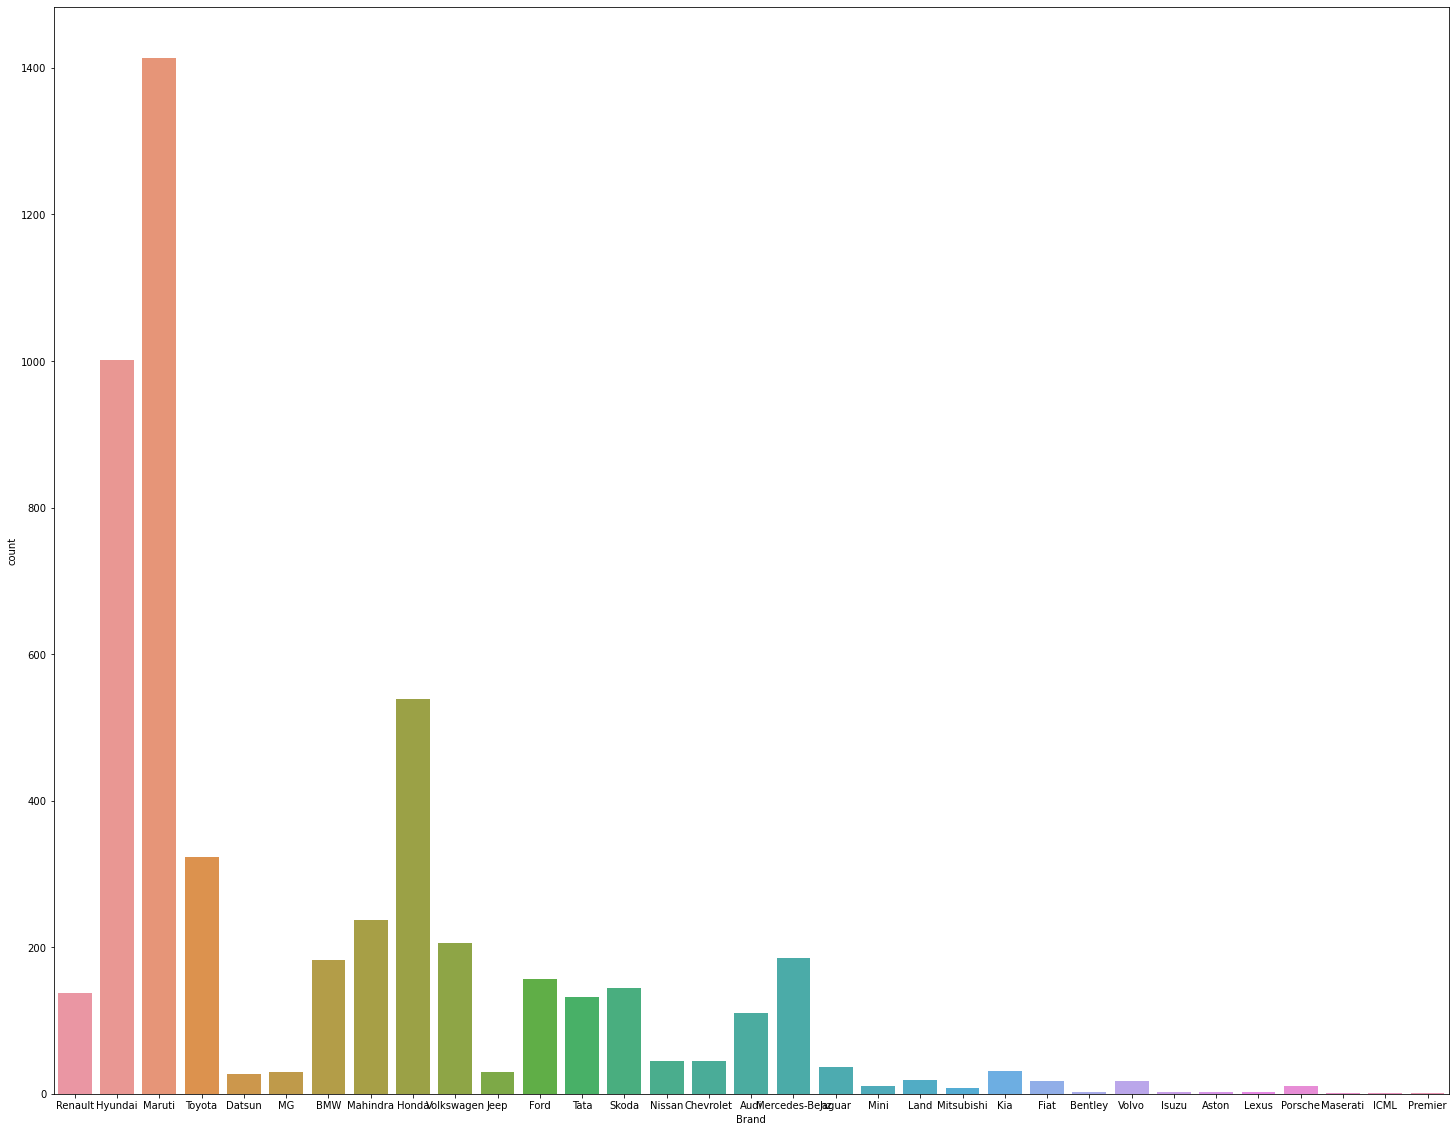

Maruti           1413
Hyundai          1002
Honda             539
Toyota            323
Mahindra          237
Volkswagen        206
Mercedes-Benz     185
BMW               183
Ford              157
Skoda             145
Renault           137
Tata              132
Audi              110
Nissan             45
Chevrolet          45
Jaguar             36
Kia                31
MG                 30
Jeep               30
Datsun             27
Land               19
Volvo              18
Fiat               17
Porsche            11
Mini               11
Mitsubishi          8
Isuzu               2
Bentley             2
Aston               2
Lexus               2
Premier             1
Maserati            1
ICML                1
Name: Brand, dtype: int64

In [13]:
plt.figure(figsize=(25,20))
sns.countplot('Brand',data=df)
plt.show()
df['Brand'].value_counts()

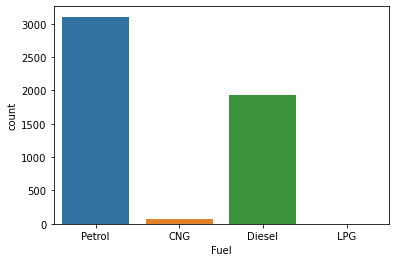

Petrol    3106
Diesel    1931
CNG         67
LPG          4
Name: Fuel, dtype: int64

In [14]:
sns.countplot('Fuel',data=df)
plt.show()
df['Fuel'].value_counts()

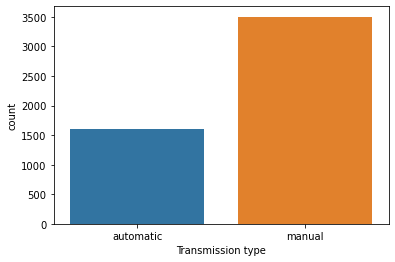

manual       3502
automatic    1606
Name: Transmission type, dtype: int64

In [15]:
sns.countplot('Transmission type',data=df)
plt.show()
df['Transmission type'].value_counts()

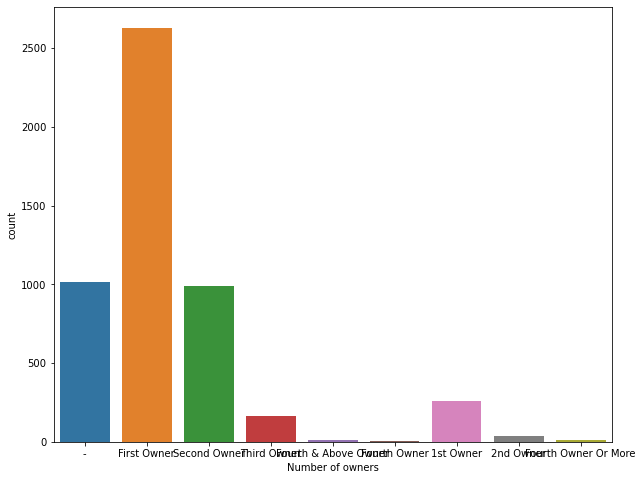

First Owner             2630
-                       1012
Second Owner             988
1st Owner                257
Third Owner              161
2nd Owner                 37
Fourth & Above Owner      10
Fourth Owner Or More      10
Fourth Owner               3
Name: Number of owners, dtype: int64

In [16]:
plt.figure(figsize=(10,8))
sns.countplot('Number of owners',data=df)
plt.show()
df['Number of owners'].value_counts()

In [18]:
#replacing values  
df.replace({'Number of owners':{'-':'First Owner','1st Owner':'First Owner','2nd Owner':'Second Owner',
                                'Fourth Owner Or More':'Fourth & Above Owner'}},inplace=True)

In [19]:
#values replaced
df['Number of owners'].value_counts()

First Owner             3899
Second Owner            1025
Third Owner              161
Fourth & Above Owner      20
Fourth Owner               3
Name: Number of owners, dtype: int64

In [20]:
df.columns

Index(['Brand', 'Model', 'Manufacture Year', 'variant', 'Fuel',
       'Driven Kilometers', 'Transmission type', 'Location', 'Price',
       'Number of owners'],
      dtype='object')

In [21]:
#here we want to rreplace the 'kms' from the value
df['Driven Kilometers'].value_counts()

80,000 kms      68
60,000 kms      57
70,000 kms      57
1,20,000 kms    51
65,000 kms      50
                ..
76,592 kms       1
50,900 kms       1
67,569 kms       1
40,123 kms       1
69,150 kms       1
Name: Driven Kilometers, Length: 2609, dtype: int64

In [22]:
#replaced using replace function in string
df['Driven Kilometers'] = df['Driven Kilometers'].str.replace('kms', '')

In [23]:
df['Driven Kilometers'].value_counts()

80,000       68
60,000       57
70,000       57
1,20,000     51
65,000       50
             ..
92,064        1
22,228        1
63,278        1
39,326        1
75,146        1
Name: Driven Kilometers, Length: 2609, dtype: int64

In [24]:
df.dtypes

Brand                object
Model                object
Manufacture Year      int64
variant              object
Fuel                 object
Driven Kilometers    object
Transmission type    object
Location             object
Price                object
Number of owners     object
dtype: object

In [25]:
#driven kilometers are in object type we can convert them into integer using to_numeric in python 
df['Driven Kilometers']=df['Driven Kilometers'].str.replace(',','')
df['Driven Kilometers']=pd.to_numeric(df['Driven Kilometers'])
df['Driven Kilometers']

0        26769
1        13342
2        33824
3        18679
4         4694
         ...  
5104      4258
5105    136814
5106     54374
5107    104313
5108     27402
Name: Driven Kilometers, Length: 5108, dtype: int64

In [26]:
#df['Driven Kilometers']

In [27]:
#driven kilometers are in object type we can convert them into integer using to_numeric in python 
df['Price']=df['Price'].str.replace(',','')
df['Price']=pd.to_numeric(df['Price'])
df['Price']

0       342000
1       448000
2       266000
3       346500
4       954000
         ...  
5104    365000
5105    441500
5106    449500
5107    560500
5108    674500
Name: Price, Length: 5108, dtype: int64

In [28]:
df.dtypes

Brand                object
Model                object
Manufacture Year      int64
variant              object
Fuel                 object
Driven Kilometers     int64
Transmission type    object
Location             object
Price                 int64
Number of owners     object
dtype: object

# Encoding

In [29]:
#creating dummies for features fuel and transmission
df=pd.get_dummies(df,columns=['Fuel'])

df=pd.get_dummies(df,columns=['Transmission type'])

In [30]:
#creating dummies for feature number of owners
df=pd.get_dummies(df,columns=['Number of owners'])

In [31]:
#dummies created
df.columns

Index(['Brand', 'Model', 'Manufacture Year', 'variant', 'Driven Kilometers',
       'Location', 'Price', 'Fuel_CNG', 'Fuel_Diesel', 'Fuel_LPG',
       'Fuel_Petrol', 'Transmission type_automatic',
       'Transmission type_manual', 'Number of owners_First Owner',
       'Number of owners_Fourth & Above Owner',
       'Number of owners_Fourth Owner', 'Number of owners_Second Owner',
       'Number of owners_Third Owner'],
      dtype='object')

In [32]:
df.head()

,Brand,Model,Manufacture Year,variant,Driven Kilometers,Location,Price,Fuel_CNG,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,Transmission type_automatic,Transmission type_manual,Number of owners_First Owner,Number of owners_Fourth & Above Owner,Number of owners_Fourth Owner,Number of owners_Second Owner,Number of owners_Third Owner
0,Renault,KWID,2016,1.0 RXT Optional AT 2016-2019,26769,Bhopal,342000,0,0,0,1,1,0,1,0,0,0,0
1,Renault,KWID,2019,1.0 RXT Optional AT 2016-2019,13342,Mumbai,448000,0,0,0,1,1,0,1,0,0,0,0
2,Hyundai,EON,2013,Magna Plus,33824,Mumbai,266000,0,0,0,1,0,1,1,0,0,0,0
3,Maruti,Alto,2016,CNG LXI,18679,Mumbai,346500,1,0,0,0,0,1,1,0,0,0,0
4,Hyundai,Verna,2018,VTVT 1.6 SX,4694,Mumbai,954000,0,0,0,1,0,1,1,0,0,0,0


In [33]:
le=LabelEncoder()
var=['Brand','Model','variant','Location']
#storing column names to encode

for i in var:
    df[i]=le.fit_transform(df[i])

In [34]:
#Features encoded
df.head()

,Brand,Model,Manufacture Year,variant,Driven Kilometers,Location,Price,Fuel_CNG,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,Transmission type_automatic,Transmission type_manual,Number of owners_First Owner,Number of owners_Fourth & Above Owner,Number of owners_Fourth Owner,Number of owners_Second Owner,Number of owners_Third Owner
0,27,91,2016,19,26769,17,342000,0,0,0,1,1,0,1,0,0,0,0
1,27,91,2019,19,13342,78,448000,0,0,0,1,1,0,1,0,0,0,0
2,9,53,2013,930,33824,78,266000,0,0,0,1,0,1,1,0,0,0,0
3,19,16,2016,664,18679,78,346500,1,0,0,0,0,1,1,0,0,0,0
4,9,171,2018,1171,4694,78,954000,0,0,0,1,0,1,1,0,0,0,0


In [35]:
df.dtypes

Brand                                    int32
Model                                    int32
Manufacture Year                         int64
variant                                  int32
Driven Kilometers                        int64
Location                                 int32
Price                                    int64
Fuel_CNG                                 uint8
Fuel_Diesel                              uint8
Fuel_LPG                                 uint8
Fuel_Petrol                              uint8
Transmission type_automatic              uint8
Transmission type_manual                 uint8
Number of owners_First Owner             uint8
Number of owners_Fourth & Above Owner    uint8
Number of owners_Fourth Owner            uint8
Number of owners_Second Owner            uint8
Number of owners_Third Owner             uint8
dtype: object

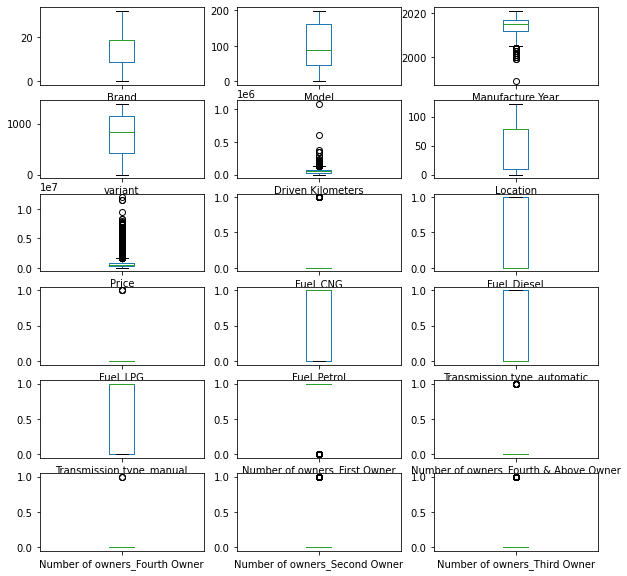

In [36]:
#checking outliers using boxplot
df.plot(kind='box',figsize=(10,10),layout=(6,3),sharex=False,subplots=True)
plt.show()

# Bivariate Analysis

Scatter Plot

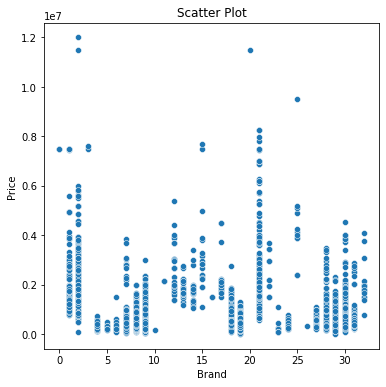

In [37]:
plt.figure(figsize=(6,6))
plt.xlabel("Brand")
plt.ylabel("Price")
plt.title("Scatter Plot")
sns.scatterplot(x="Brand",y="Price",data=df)
plt.show()

In [38]:
df.columns

Index(['Brand', 'Model', 'Manufacture Year', 'variant', 'Driven Kilometers',
       'Location', 'Price', 'Fuel_CNG', 'Fuel_Diesel', 'Fuel_LPG',
       'Fuel_Petrol', 'Transmission type_automatic',
       'Transmission type_manual', 'Number of owners_First Owner',
       'Number of owners_Fourth & Above Owner',
       'Number of owners_Fourth Owner', 'Number of owners_Second Owner',
       'Number of owners_Third Owner'],
      dtype='object')

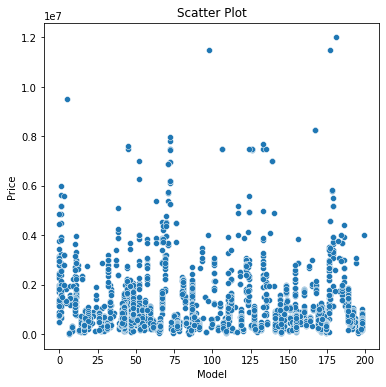

In [39]:
plt.figure(figsize=(6,6))
plt.xlabel("Model")
plt.ylabel("Price")
plt.title("Scatter Plot")
sns.scatterplot(x="Model",y="Price",data=df)
plt.show()

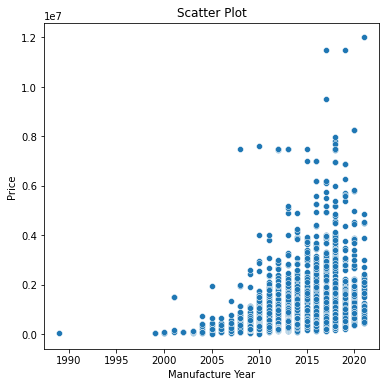

In [40]:
plt.figure(figsize=(6,6))
plt.xlabel("Manufacture Year")
plt.ylabel("Price")
plt.title("Scatter Plot")
sns.scatterplot(x="Manufacture Year",y="Price",data=df)
plt.show()

Price increasing when the manufacture year and selling year decreases

In [41]:
df.columns

Index(['Brand', 'Model', 'Manufacture Year', 'variant', 'Driven Kilometers',
       'Location', 'Price', 'Fuel_CNG', 'Fuel_Diesel', 'Fuel_LPG',
       'Fuel_Petrol', 'Transmission type_automatic',
       'Transmission type_manual', 'Number of owners_First Owner',
       'Number of owners_Fourth & Above Owner',
       'Number of owners_Fourth Owner', 'Number of owners_Second Owner',
       'Number of owners_Third Owner'],
      dtype='object')

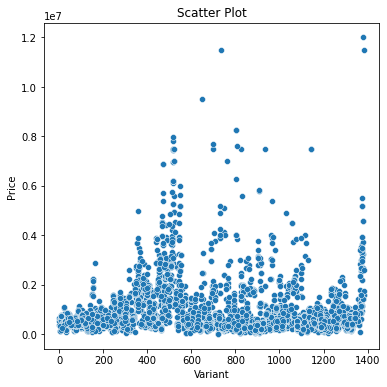

In [42]:
plt.figure(figsize=(6,6))
plt.xlabel("Variant")
plt.ylabel("Price")
plt.title("Scatter Plot")
sns.scatterplot(x="variant",y="Price",data=df)
plt.show()

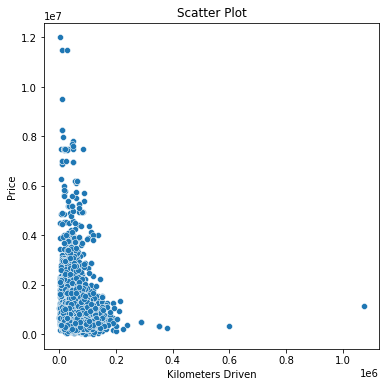

In [43]:
plt.figure(figsize=(6,6))
plt.xlabel("Kilometers Driven")
plt.ylabel("Price")
plt.title("Scatter Plot")
sns.scatterplot(x="Driven Kilometers",y="Price",data=df)
plt.show()

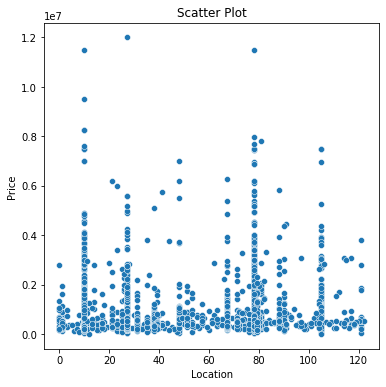

In [44]:
plt.figure(figsize=(6,6))
plt.xlabel("Location")
plt.ylabel("Price")
plt.title("Scatter Plot")
sns.scatterplot(x="Location",y="Price",data=df)
plt.show()

# Correlation

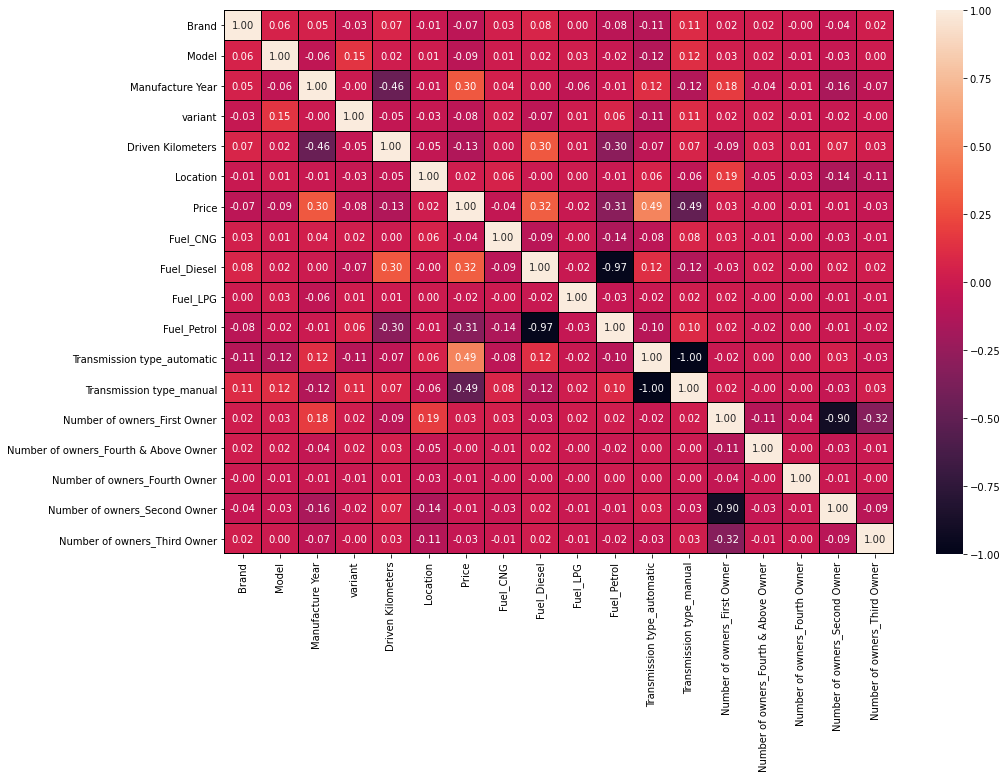

In [45]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")
plt.show()

Here Manufacture year is correlated to price,transmissin type also correlated to them, fuel petrol is negatively correlated and fuel diesel vehicles are positively correlated price. so the data makes sense.

# Outliers

In [46]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]

In [47]:
print(df.shape)
print(df_new.shape)#ater removing outliers

(5108, 18)
(4677, 18)


In [48]:
print("Percentage of data loss after removing outliers:",(5108-4677)/5108*100)

Percentage of data loss after removing outliers: 8.437744714173846


As our dataset having only 5000 datas, lossing 8% of data also may affect on the prediction so I am proceeding with outliers

# Seperating Features and Target

In [49]:
x=df.drop('Price', axis = 1)
y = df['Price']

In [50]:
x.head()

,Brand,Model,Manufacture Year,variant,Driven Kilometers,Location,Fuel_CNG,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,Transmission type_automatic,Transmission type_manual,Number of owners_First Owner,Number of owners_Fourth & Above Owner,Number of owners_Fourth Owner,Number of owners_Second Owner,Number of owners_Third Owner
0,27,91,2016,19,26769,17,0,0,0,1,1,0,1,0,0,0,0
1,27,91,2019,19,13342,78,0,0,0,1,1,0,1,0,0,0,0
2,9,53,2013,930,33824,78,0,0,0,1,0,1,1,0,0,0,0
3,19,16,2016,664,18679,78,1,0,0,0,0,1,1,0,0,0,0
4,9,171,2018,1171,4694,78,0,0,0,1,0,1,1,0,0,0,0


In [51]:
pd.DataFrame(y.head())

,Price
0,342000
1,448000
2,266000
3,346500
4,954000


# Skewness

In [52]:
x.skew()

Brand                                     0.178627
Model                                     0.086948
Manufacture Year                         -0.663289
variant                                  -0.281051
Driven Kilometers                         6.147080
Location                                 -0.344870
Fuel_CNG                                  8.561258
Fuel_Diesel                               0.503206
Fuel_LPG                                 35.703633
Fuel_Petrol                              -0.442857
Transmission type_automatic               0.799715
Transmission type_manual                 -0.799715
Number of owners_First Owner             -1.239339
Number of owners_Fourth & Above Owner    15.891893
Number of owners_Fourth Owner            41.239132
Number of owners_Second Owner             1.495249
Number of owners_Third Owner              5.364341
dtype: float64

# Removal of Skewness

In [53]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

# Scaling

In [54]:
sc=StandardScaler()
x=sc.fit_transform(x)

# Model Building

In [55]:
#linear regression
lr=LinearRegression()
l=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training r2_score is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing r2_score is:- {r2_score(y_test,pred_test)}")
    print("\n")
    if round(r2_score(y_train,pred_train)*100)==round(r2_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        l.append(i)

At random state 0,the training r2_score is:- 0.3757302286535651
At random state 0,the testing r2_score is:- 0.46413603057219344


At random state 1,the training r2_score is:- 0.3860274177125942
At random state 1,the testing r2_score is:- -1.8718662389868046e+23


At random state 2,the training r2_score is:- 0.3936602792274576
At random state 2,the testing r2_score is:- 0.3663535327505564


At random state 3,the training r2_score is:- 0.38380519325465057
At random state 3,the testing r2_score is:- 0.4073807211470968


At random state 4,the training r2_score is:- 0.3830575208873819
At random state 4,the testing r2_score is:- 0.4103966709580157


At random state 5,the training r2_score is:- 0.4035034303484526
At random state 5,the testing r2_score is:- 0.3411660998921897


At random state 6,the training r2_score is:- 0.39017332176894537
At random state 6,the testing r2_score is:- 0.3845161543889162


At random state 7,the training r2_score is:- 0.3754491310307969
At random state 7,the tes

At random state 65,the testing r2_score is:- 0.4002922416714353


At random state 66,the training r2_score is:- 0.38650385930225506
At random state 66,the testing r2_score is:- 0.391838690161456


At random state 66 model performs well
At random state 67,the training r2_score is:- 0.3892509938948969
At random state 67,the testing r2_score is:- 0.387928744477969


At random state 67 model performs well
At random state 68,the training r2_score is:- 0.3887998035227962
At random state 68,the testing r2_score is:- 0.3879887028501906


At random state 68 model performs well
At random state 69,the training r2_score is:- 0.3817819495372229
At random state 69,the testing r2_score is:- 0.4271628778446861


At random state 70,the training r2_score is:- 0.38494922330829706
At random state 70,the testing r2_score is:- 0.4085348424032661


At random state 71,the training r2_score is:- 0.39155540519640475
At random state 71,the testing r2_score is:- 0.37937029942302947


At random state 72,the traini

At random state 125,the testing r2_score is:- 0.44154302596865325


At random state 126,the training r2_score is:- 0.3772846609549332
At random state 126,the testing r2_score is:- 0.45496654542169535


At random state 127,the training r2_score is:- 0.3921063604368319
At random state 127,the testing r2_score is:- 0.37877874021441793


At random state 128,the training r2_score is:- 0.38869902475934603
At random state 128,the testing r2_score is:- 0.38710021555941987


At random state 128 model performs well
At random state 129,the training r2_score is:- 0.39593991688298613
At random state 129,the testing r2_score is:- 0.36251652338341533


At random state 130,the training r2_score is:- 0.39597445533131637
At random state 130,the testing r2_score is:- 0.3523711405253688


At random state 131,the training r2_score is:- 0.3840316458384492
At random state 131,the testing r2_score is:- 0.40752855035155255


At random state 132,the training r2_score is:- 0.3854249116345001
At random state 132,

At random state 194,the training r2_score is:- 0.38407875491562704
At random state 194,the testing r2_score is:- 0.4120159585823878


At random state 195,the training r2_score is:- 0.3916869183546693
At random state 195,the testing r2_score is:- 0.3766059932844611


At random state 196,the training r2_score is:- 0.383044444510901
At random state 196,the testing r2_score is:- 0.4154405713148669


At random state 197,the training r2_score is:- 0.38796850596918586
At random state 197,the testing r2_score is:- 0.39419866616348087


At random state 197 model performs well
At random state 198,the training r2_score is:- 0.3898169679158734
At random state 198,the testing r2_score is:- 0.3856892516727697


At random state 198 model performs well
At random state 199,the training r2_score is:- 0.39407345266264404
At random state 199,the testing r2_score is:- 0.3711040620167444




In [56]:
l

[10,
 23,
 28,
 30,
 42,
 52,
 55,
 66,
 67,
 68,
 84,
 87,
 91,
 100,
 111,
 123,
 128,
 134,
 139,
 147,
 154,
 156,
 157,
 164,
 171,
 185,
 197,
 198]

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=198)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("r2 score",r2_score(y_test,predlr)*100)
print("Mean Absolute error",mean_absolute_error(y_test,predlr))
print("RMSE",np.sqrt(mean_squared_error(y_test,predlr)))

r2 score 38.568925167276966
Mean Absolute error 443790.10986203665
RMSE 809648.8093356793


In [58]:
#knn regressor
kn=KNeighborsRegressor()
k=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    kn.fit(x_train,y_train)
    pred_train=kn.predict(x_train)
    pred_test=kn.predict(x_test)
    print(f"At random state {i},the training r2_score is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing r2_score is:- {r2_score(y_test,pred_test)}")
    print("\n")
    if round(r2_score(y_train,pred_train)*100)==round(r2_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        k.append(i)

At random state 0,the training r2_score is:- 0.7261408100015653
At random state 0,the testing r2_score is:- 0.5778999839730917


At random state 1,the training r2_score is:- 0.7305834069505204
At random state 1,the testing r2_score is:- 0.5921037592996794


At random state 2,the training r2_score is:- 0.7223644317056059
At random state 2,the testing r2_score is:- 0.6386454650525484


At random state 3,the training r2_score is:- 0.7245876809292391
At random state 3,the testing r2_score is:- 0.5728396047640723


At random state 4,the training r2_score is:- 0.7270023160427082
At random state 4,the testing r2_score is:- 0.5836445715540948


At random state 5,the training r2_score is:- 0.7359967038512671
At random state 5,the testing r2_score is:- 0.5542405442703093


At random state 6,the training r2_score is:- 0.7241939131668432
At random state 6,the testing r2_score is:- 0.5764951990037899


At random state 7,the training r2_score is:- 0.7229971662496127
At random state 7,the testing r2_

At random state 63,the training r2_score is:- 0.7285271938441338
At random state 63,the testing r2_score is:- 0.6005500909047762


At random state 64,the training r2_score is:- 0.7221823478825636
At random state 64,the testing r2_score is:- 0.6788834927269761


At random state 65,the training r2_score is:- 0.7124879622731435
At random state 65,the testing r2_score is:- 0.5753385393629485


At random state 66,the training r2_score is:- 0.7236403400945018
At random state 66,the testing r2_score is:- 0.6395891954020654


At random state 67,the training r2_score is:- 0.7311846217793749
At random state 67,the testing r2_score is:- 0.5725201530894926


At random state 68,the training r2_score is:- 0.7272851407650338
At random state 68,the testing r2_score is:- 0.5756290274179062


At random state 69,the training r2_score is:- 0.7284576631681516
At random state 69,the testing r2_score is:- 0.5919336521684909


At random state 70,the training r2_score is:- 0.7249583330007158
At random state 70

At random state 126,the training r2_score is:- 0.7252666050219565
At random state 126,the testing r2_score is:- 0.6080280371490865


At random state 127,the training r2_score is:- 0.7419137436633443
At random state 127,the testing r2_score is:- 0.5157684628061356


At random state 128,the training r2_score is:- 0.7324925756323626
At random state 128,the testing r2_score is:- 0.5491509327025257


At random state 129,the training r2_score is:- 0.7393943545083508
At random state 129,the testing r2_score is:- 0.49288665458507563


At random state 130,the training r2_score is:- 0.7442176717477638
At random state 130,the testing r2_score is:- 0.49582075987936725


At random state 131,the training r2_score is:- 0.7391409570317606
At random state 131,the testing r2_score is:- 0.5287212617640001


At random state 132,the training r2_score is:- 0.721510171677859
At random state 132,the testing r2_score is:- 0.6303509545522559


At random state 133,the training r2_score is:- 0.7430766667546181
At

At random state 188,the training r2_score is:- 0.7345492173057251
At random state 188,the testing r2_score is:- 0.5404951119083281


At random state 189,the training r2_score is:- 0.7397118437311807
At random state 189,the testing r2_score is:- 0.5306294595534762


At random state 190,the training r2_score is:- 0.7356838640536021
At random state 190,the testing r2_score is:- 0.5415974447344786


At random state 191,the training r2_score is:- 0.726108112953298
At random state 191,the testing r2_score is:- 0.5462890300753228


At random state 192,the training r2_score is:- 0.7407383986741616
At random state 192,the testing r2_score is:- 0.5346072680410051


At random state 193,the training r2_score is:- 0.7240486690772123
At random state 193,the testing r2_score is:- 0.5786406766746945


At random state 194,the training r2_score is:- 0.7309527955531344
At random state 194,the testing r2_score is:- 0.5896134598232108


At random state 195,the training r2_score is:- 0.726940641269411
At ra

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=64)
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
print("r2 score",r2_score(y_test,predkn)*100)
print("Mean Absolute error",mean_absolute_error(y_test,predkn))
print("RMSE",np.sqrt(mean_squared_error(y_test,predkn)))

r2 score 67.88834927269761
Mean Absolute error 268875.5457925636
RMSE 536378.0882105023


In [60]:
#dt regression
dt=DecisionTreeRegressor()
d=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    print(f"At random state {i},the training r2_score is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing r2_score is:- {r2_score(y_test,pred_test)}")
    print("\n")
    if round(r2_score(y_train,pred_train)*100)==round(r2_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        d.append(i)

At random state 0,the training r2_score is:- 0.999987292627306
At random state 0,the testing r2_score is:- 0.7576341953979364


At random state 1,the training r2_score is:- 0.9999981651372872
At random state 1,the testing r2_score is:- 0.7608190888500143


At random state 2,the training r2_score is:- 0.9999985351767617
At random state 2,the testing r2_score is:- 0.717145003609537


At random state 3,the training r2_score is:- 0.9999855035436904
At random state 3,the testing r2_score is:- 0.7377796013477611


At random state 4,the training r2_score is:- 0.9999864022108301
At random state 4,the testing r2_score is:- 0.6905361667070988


At random state 5,the training r2_score is:- 0.9999850089417517
At random state 5,the testing r2_score is:- 0.6383314512884786


At random state 6,the training r2_score is:- 0.9999857179829525
At random state 6,the testing r2_score is:- 0.6863048110979861


At random state 7,the training r2_score is:- 0.9999878984310424
At random state 7,the testing r2_sc

At random state 66,the training r2_score is:- 0.9999870309619814
At random state 66,the testing r2_score is:- 0.8717070695357709


At random state 67,the training r2_score is:- 0.9999870609216637
At random state 67,the testing r2_score is:- 0.6806580242295355


At random state 68,the training r2_score is:- 0.9999871225480222
At random state 68,the testing r2_score is:- 0.7055756094138472


At random state 69,the training r2_score is:- 0.9999869346038361
At random state 69,the testing r2_score is:- 0.5639930581229573


At random state 70,the training r2_score is:- 0.9999861951503709
At random state 70,the testing r2_score is:- 0.7661257483490639


At random state 71,the training r2_score is:- 0.9999976508128514
At random state 71,the testing r2_score is:- 0.7875176348615163


At random state 72,the training r2_score is:- 0.9999982587338287
At random state 72,the testing r2_score is:- 0.7058919560144634


At random state 73,the training r2_score is:- 0.9999836797387647
At random state 73

At random state 131,the training r2_score is:- 0.9999977708152928
At random state 131,the testing r2_score is:- 0.7086503889381022


At random state 132,the training r2_score is:- 0.999996759822547
At random state 132,the testing r2_score is:- 0.7057234536522414


At random state 133,the training r2_score is:- 0.9999979583999061
At random state 133,the testing r2_score is:- 0.6504456074211418


At random state 134,the training r2_score is:- 0.9999877255263867
At random state 134,the testing r2_score is:- 0.3662598637988903


At random state 135,the training r2_score is:- 0.9999859003813495
At random state 135,the testing r2_score is:- 0.7724882154013915


At random state 136,the training r2_score is:- 0.9999967287482608
At random state 136,the testing r2_score is:- 0.7471081414134444


At random state 137,the training r2_score is:- 0.9999834397531718
At random state 137,the testing r2_score is:- 0.8009811611948563


At random state 138,the training r2_score is:- 0.9999976433399917
At r

At random state 194,the training r2_score is:- 0.9999862958288342
At random state 194,the testing r2_score is:- 0.7952456099419224


At random state 195,the training r2_score is:- 0.9999869946492487
At random state 195,the testing r2_score is:- 0.82791552438531


At random state 196,the training r2_score is:- 0.9999862686710371
At random state 196,the testing r2_score is:- 0.7521114655129915


At random state 197,the training r2_score is:- 0.9999861181837344
At random state 197,the testing r2_score is:- 0.7691691705099934


At random state 198,the training r2_score is:- 0.9999967941793393
At random state 198,the testing r2_score is:- 0.7932225733081613


At random state 199,the training r2_score is:- 0.9999865910235717
At random state 199,the testing r2_score is:- 0.7590870131067451




In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=143)
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print("r2 score",r2_score(y_test,preddt)*100)
print("Mean Absolute error",mean_absolute_error(y_test,preddt))
print("RMSE",np.sqrt(mean_squared_error(y_test,preddt)))

r2 score 86.58744487971842
Mean Absolute error 149025.3439334638
RMSE 345779.51930312224


In [62]:
#rf regression
rf=RandomForestRegressor()
r=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    print(f"At random state {i},the training r2_score is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing r2_score is:- {r2_score(y_test,pred_test)}")
    print("\n")
    if round(r2_score(y_train,pred_train)*100)==round(r2_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        r.append(i)


At random state 0,the training r2_score is:- 0.9754292025903218
At random state 0,the testing r2_score is:- 0.8371672912513116


At random state 1,the training r2_score is:- 0.9775258167239778
At random state 1,the testing r2_score is:- 0.8718684453621408


At random state 2,the training r2_score is:- 0.9792093956575794
At random state 2,the testing r2_score is:- 0.8830728593932622


At random state 3,the training r2_score is:- 0.9741529591735998
At random state 3,the testing r2_score is:- 0.8523734633153239


At random state 4,the training r2_score is:- 0.9788704925544557
At random state 4,the testing r2_score is:- 0.8532857920872828


At random state 5,the training r2_score is:- 0.980548056105177
At random state 5,the testing r2_score is:- 0.7868358880825811


At random state 6,the training r2_score is:- 0.9786573809223873
At random state 6,the testing r2_score is:- 0.8554846866442817


At random state 7,the training r2_score is:- 0.9780260556342415
At random state 7,the testing r2_s

At random state 63,the training r2_score is:- 0.9736375313052992
At random state 63,the testing r2_score is:- 0.8099642512836444


At random state 64,the training r2_score is:- 0.9779819763772294
At random state 64,the testing r2_score is:- 0.9168060089293093


At random state 65,the training r2_score is:- 0.9729669138976137
At random state 65,the testing r2_score is:- 0.9024631012491562


At random state 66,the training r2_score is:- 0.9764229627477281
At random state 66,the testing r2_score is:- 0.9179017295092992


At random state 67,the training r2_score is:- 0.9781226907384688
At random state 67,the testing r2_score is:- 0.8234852132563724


At random state 68,the training r2_score is:- 0.9807476780968023
At random state 68,the testing r2_score is:- 0.8206157423790014


At random state 69,the training r2_score is:- 0.978941020045771
At random state 69,the testing r2_score is:- 0.781539983903878


At random state 70,the training r2_score is:- 0.9779616012536354
At random state 70,t

At random state 126,the training r2_score is:- 0.9783912517328892
At random state 126,the testing r2_score is:- 0.8098438921635401


At random state 127,the training r2_score is:- 0.9797933778357774
At random state 127,the testing r2_score is:- 0.809483505023977


At random state 128,the training r2_score is:- 0.9774518640285775
At random state 128,the testing r2_score is:- 0.850890763311144


At random state 129,the training r2_score is:- 0.9791648229700334
At random state 129,the testing r2_score is:- 0.8288786279813665


At random state 130,the training r2_score is:- 0.9824320118773903
At random state 130,the testing r2_score is:- 0.7549266216816433


At random state 131,the training r2_score is:- 0.98191898864733
At random state 131,the testing r2_score is:- 0.7893582781358668


At random state 132,the training r2_score is:- 0.9800062604919172
At random state 132,the testing r2_score is:- 0.8305767678949292


At random state 133,the training r2_score is:- 0.9769998120053566
At rand

At random state 188,the training r2_score is:- 0.974808881868972
At random state 188,the testing r2_score is:- 0.8480762553561747


At random state 189,the training r2_score is:- 0.9806300959231762
At random state 189,the testing r2_score is:- 0.8111744799289814


At random state 190,the training r2_score is:- 0.9744696689470291
At random state 190,the testing r2_score is:- 0.8558362270081128


At random state 191,the training r2_score is:- 0.9780348313437661
At random state 191,the testing r2_score is:- 0.8337750146555567


At random state 192,the training r2_score is:- 0.9789720315254058
At random state 192,the testing r2_score is:- 0.8418605518590403


At random state 193,the training r2_score is:- 0.9783945677850645
At random state 193,the testing r2_score is:- 0.8730890495193168


At random state 194,the training r2_score is:- 0.9776375024419305
At random state 194,the testing r2_score is:- 0.8583736465692274


At random state 195,the training r2_score is:- 0.9753238637437139
At r

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=168)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("r2 score",r2_score(y_test,predrf)*100)
print("Mean Absolute error",mean_absolute_error(y_test,predrf))
print("RMSE",np.sqrt(mean_squared_error(y_test,predrf)))

r2 score 90.79667454122806
Mean Absolute error 124913.36399468829
RMSE 257142.0813148723


# Cross validation Score

In [64]:
print("CV score and it's mean of KNearest Neighbors:",cross_val_score(kn,x,y,cv=7).mean(),"r2 score:",r2_score(y_test,predkn))
print("CV score and it's mean of Decision Tree Regressor:",cross_val_score(dt,x,y,cv=7).mean(),"r2 score:",r2_score(y_test,preddt))
print("CV score and it's mean of Linear Regression:",cross_val_score(lr,x,y,cv=7).mean(),"r2 score:",r2_score(y_test,predlr))
print("CV score and it's mean of Random Forest:",cross_val_score(rf,x,y,cv=7).mean(),"r2 score:",r2_score(y_test,predrf))

CV score and it's mean of KNearest Neighbors: 0.5374994561007403 r2 score: -1.0421256827711636
CV score and it's mean of Decision Tree Regressor: 0.6289555831591814 r2 score: -1.1536565646356043
CV score and it's mean of Linear Regression: -7.579477425048171e+20 r2 score: -0.5600510057072758
CV score and it's mean of Random Forest: 0.7927324919249479 r2 score: 0.9079667454122806


Random forest have least difference in r2 score and cv score

# Hyper parameter tuning

In [73]:
parameters={'min_samples_split':np.arange(10,15),'n_estimators':np.arange(120,140),'criterion':['squared_error','absolute_error','poisson'],
          'max_depth':np.arange(20,32)}

In [74]:
gsv=GridSearchCV(rf,parameters,cv=7)

In [75]:
gsv.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
                         'min_samples_split': array([10, 11, 12, 13, 14]),
                         'n_estimators': array([120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139])})

In [76]:
gsv.best_params_

{'criterion': 'poisson',
 'max_depth': 31,
 'min_samples_split': 10,
 'n_estimators': 132}

In [77]:
best=RandomForestRegressor(criterion='poisson',max_depth=31,min_samples_split=10,n_estimators=132)
best.fit(x_train,y_train)
predbest=best.predict(x_test)
acc_b=(r2_score(y_test,predbest))
print(acc_b*100)

67.5868256763651


In [80]:
import joblib as jb
jb.dump(best,"Car_Price.pkl")

['Car_Price.pkl']